Business challenge/requirement

Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries.  It provides battery on a rental model to e-
vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. 
Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.
You as a ML expert have  to create a cluster model where drivers can be grouped together based on the driving data.

Key issues
Drivers will be incentivized based on the cluster, so grouping has to be accurate 

Considerations
NONE

Data volume -
4000 records – file driver-data.csv

Fields in Data
•id: Unique Id of the driver 
•mean_dist_day: Mean distance driven by driver per day
•mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over 
the speed limit

Additional information-
NA
Business benefits
Increase in profits,up to 15-20% as drivers with poor history will be charged more

In [1]:
# read data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [2]:
# use elbow method to get hyperparameter - number of cluster
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

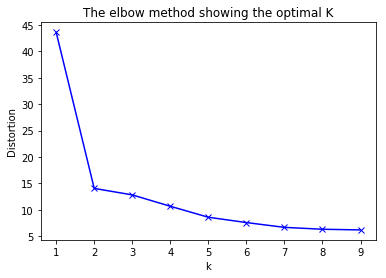

In [3]:
f1 = df['mean_dist_day'].values
f2 = df['mean_over_speed_perc'].values

X = np.array(list(zip(f1,f2)))

colors = ['b','g','r']
markers = ['o','v','s']

distortions = []
K = range(1,10)

for k in K:
    kMeansModel = KMeans(n_clusters = k).fit(X)
    kMeansModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kMeansModel.cluster_centers_,'euclidean'),axis = 1))/X.shape[0])
    
#plot the elbow
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showing the optimal K')
plt.show()

In [6]:
# applying model
kMeans = KMeans(n_clusters = 2)
kMeans.fit(X)
#cluster vectors
kMeans.cluster_centers_

print(kMeans.labels_)
print(len(kMeans.labels_))
df['clusters'] = kMeans.labels_
print(df['clusters'])

[0 0 0 ... 1 1 1]
4000
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3970    1
3971    1
3972    1
3973    1
3974    1
3975    1
3976    1
3977    1
3978    1
3979    1
3980    1
3981    1
3982    1
3983    1
3984    1
3985    1
3986    1
3987    1
3988    1
3989    1
3990    1
3991    1
3992    1
3993    1
3994    1
3995    1
3996    1
3997    1
3998    1
3999    1
Name: clusters, Length: 4000, dtype: int32
